## Data Analysis of major technology stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import stock data from yahoo

#from pandas_datareader.data import DataReader
import yfinance as yf
#print(yf.download)
#from pandas_datareader import data as pdr
print(yf.__version__)

from datetime import datetime
from dateutil.relativedelta import relativedelta


0.2.61


I am going to set up the company names and tickers that I want to analyze and make an inference on some relations I assume between these companies.

Some thoughts I have prior to doing any analysis is that most technology companies are going to follow a similar trend in terms of price movement,
but competitors such as AMD and Nvidia might have an inverse relationship.

In [2]:
#creating a list of companies to loop through to make storing data easier
company_name = ['Google', 'Apple', 'Nvidia', 'AMD', 'Tesla', 'Microsoft', 'Amazon']
company_ticker = ['GOOG', 'AAPL', 'NVDA', 'AMD', 'TSLA', 'MSFT', 'AMZN']

# Added code below because yfinance has 'rate-limiter error' maybe due to yahoo api changes. This is a temporary workaround -- also added 'session = session' to yf.download script\
# from curl_cffi import requests
# session = requests.Session(impersonate="chrome")
# ^ New Yfinance update makes these steps uneeded, but will keep here in case



today = datetime.now()# we are going to grab all these stocks that we want using the yahoo finance, and get data on them from one year ago to now
one_year_ago = today - relativedelta(years=1)

# to grab the data, I decided to create a dictionary to store the dataframes of each ticker in
stock_data = {}
for ticker, company in zip(company_ticker, company_name):
    df = yf.download(ticker, start=one_year_ago, end=today)
    df['Company_Name'] = company
    df.columns = df.columns.get_level_values(0) #did this to remove the multi-index columns that yfinance defaults to
    print(df.columns)
    stock_data[ticker] = df


# test if data properly stored in dictionary
#(stock_data['GOOG'].head())
#stock_data['GOOG'].describe()
#stock_data['GOOG'].info()
#print(stock_data[ticker])
#stock_data['GOOG'].columns
#type(stock_data)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')



[*********************100%***********************]  1 of 1 completed


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')
Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')


[*********************100%***********************]  1 of 1 completed

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Company_Name'], dtype='object', name='Price')


I visualized the closing price three different ways:
1st way(commented out): each stock has its own graph
2nd way: one graph with the closing prices of every stock
3rd way: a 2x4 subplot with each stock in its own respective plot

I found that the best way to visualize closing prices in my case was to use one graph since I am trying to see if all technology stocks follow a similar trend. As seen from the plot, we can visually see that only Tesla deviated from the regular trend.

That is as expected since Tesla is a highly volatile stock. What I did not expect, is that Nvidia and AMD follow a similar trend. When Nvidia prices increase, AMD follows suit. Very interesting.

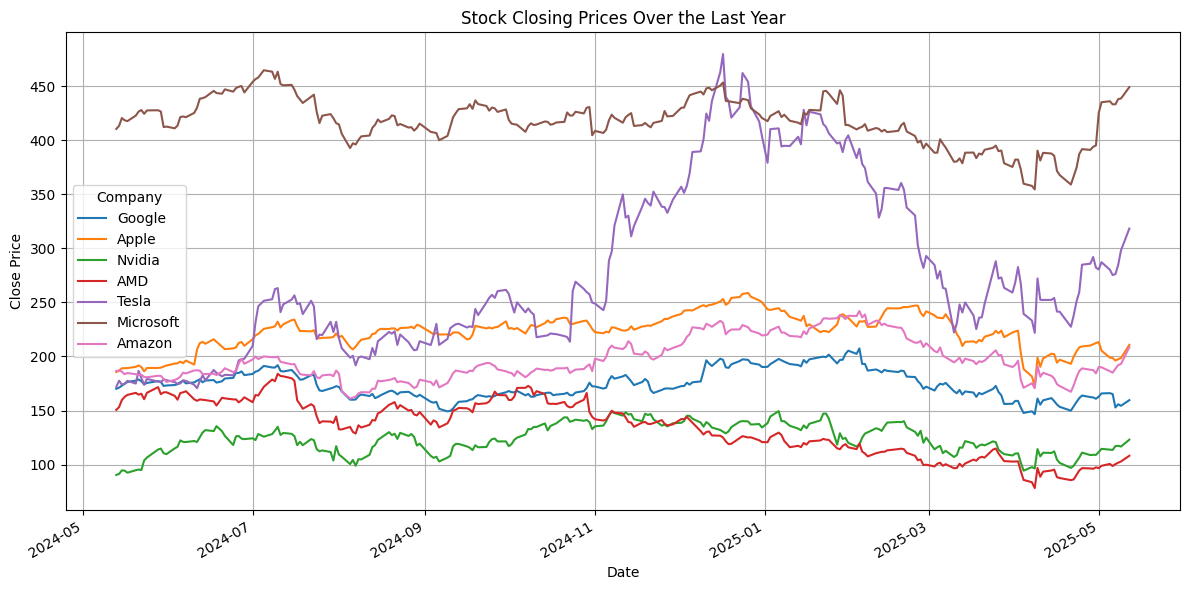

In [4]:


# for i, ticker in enumerate(stock_data):
#     stock_data[ticker]['Close'].plot()
#     plt.ylabel('Close')
#     plt.title(f"{company_name[i]} Closing Prices")
#     plt.show()


plt.figure(figsize=(12, 6))

for i, ticker in enumerate(stock_data):
    stock_data[ticker]['Close'].plot(label=company_name[i])

plt.ylabel('Close Price')
plt.title('Stock Closing Prices Over the Last Year')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()


# fig, axes = plt.subplots(4, 2, figsize=(15, 15))
# axes = axes.flatten()

# for i, ticker in enumerate(stock_data):
#     stock_data[ticker]['Close'].plot(ax=axes[i])
#     axes[i].set_ylabel('Close')
#     axes[i].set_title(f"{company_name[i]} Closing Prices")
#     axes[i].grid(True)

# axes[-1].axis('off')
# plt.tight_layout()


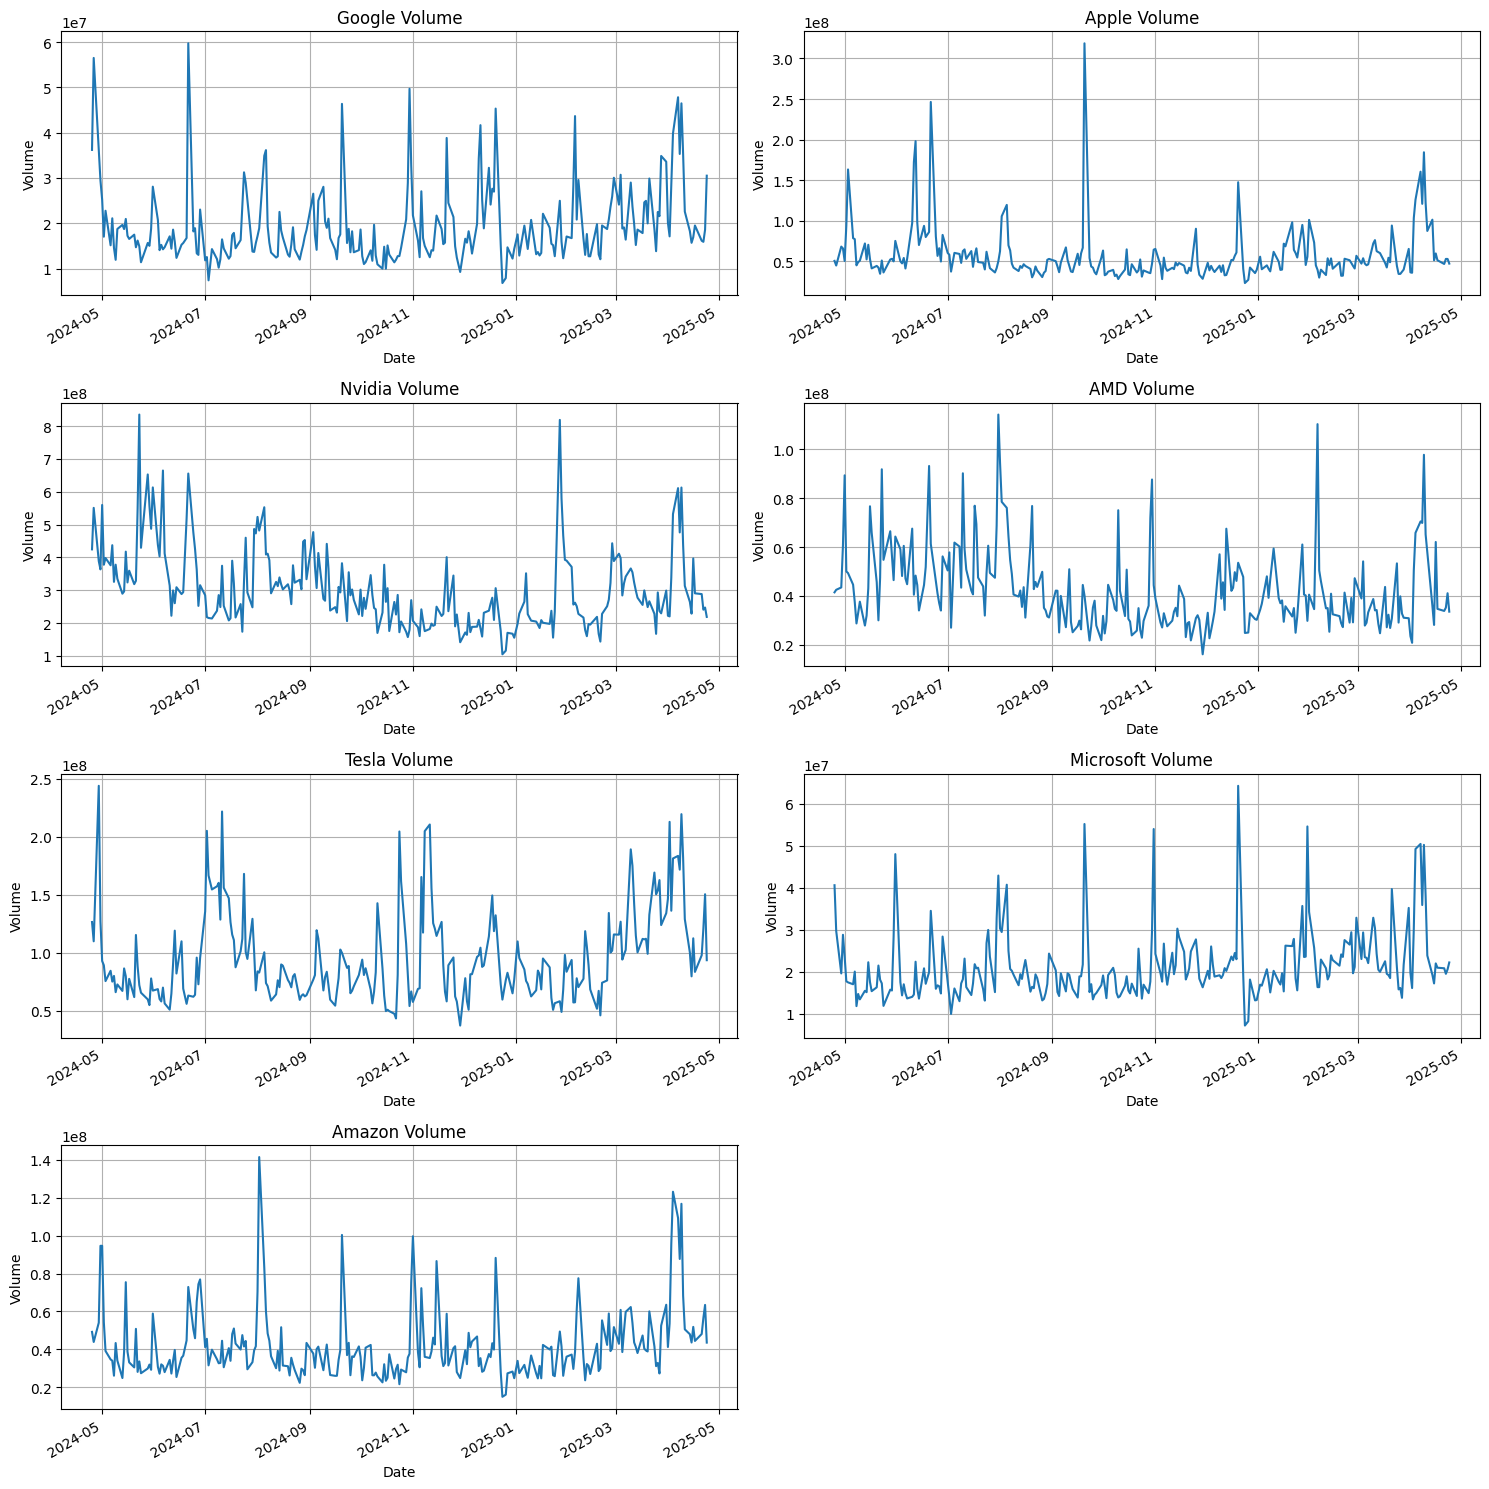

In [33]:

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()


for i, ticker in enumerate(stock_data):
    stock_data[ticker]['Volume'].plot(ax=axes[i])
    axes[i].set_ylabel('Volume')
    axes[i].set_title(f"{company_name[i]} Volume")
    axes[i].grid(True)


axes[-1].axis('off')

plt.tight_layout()


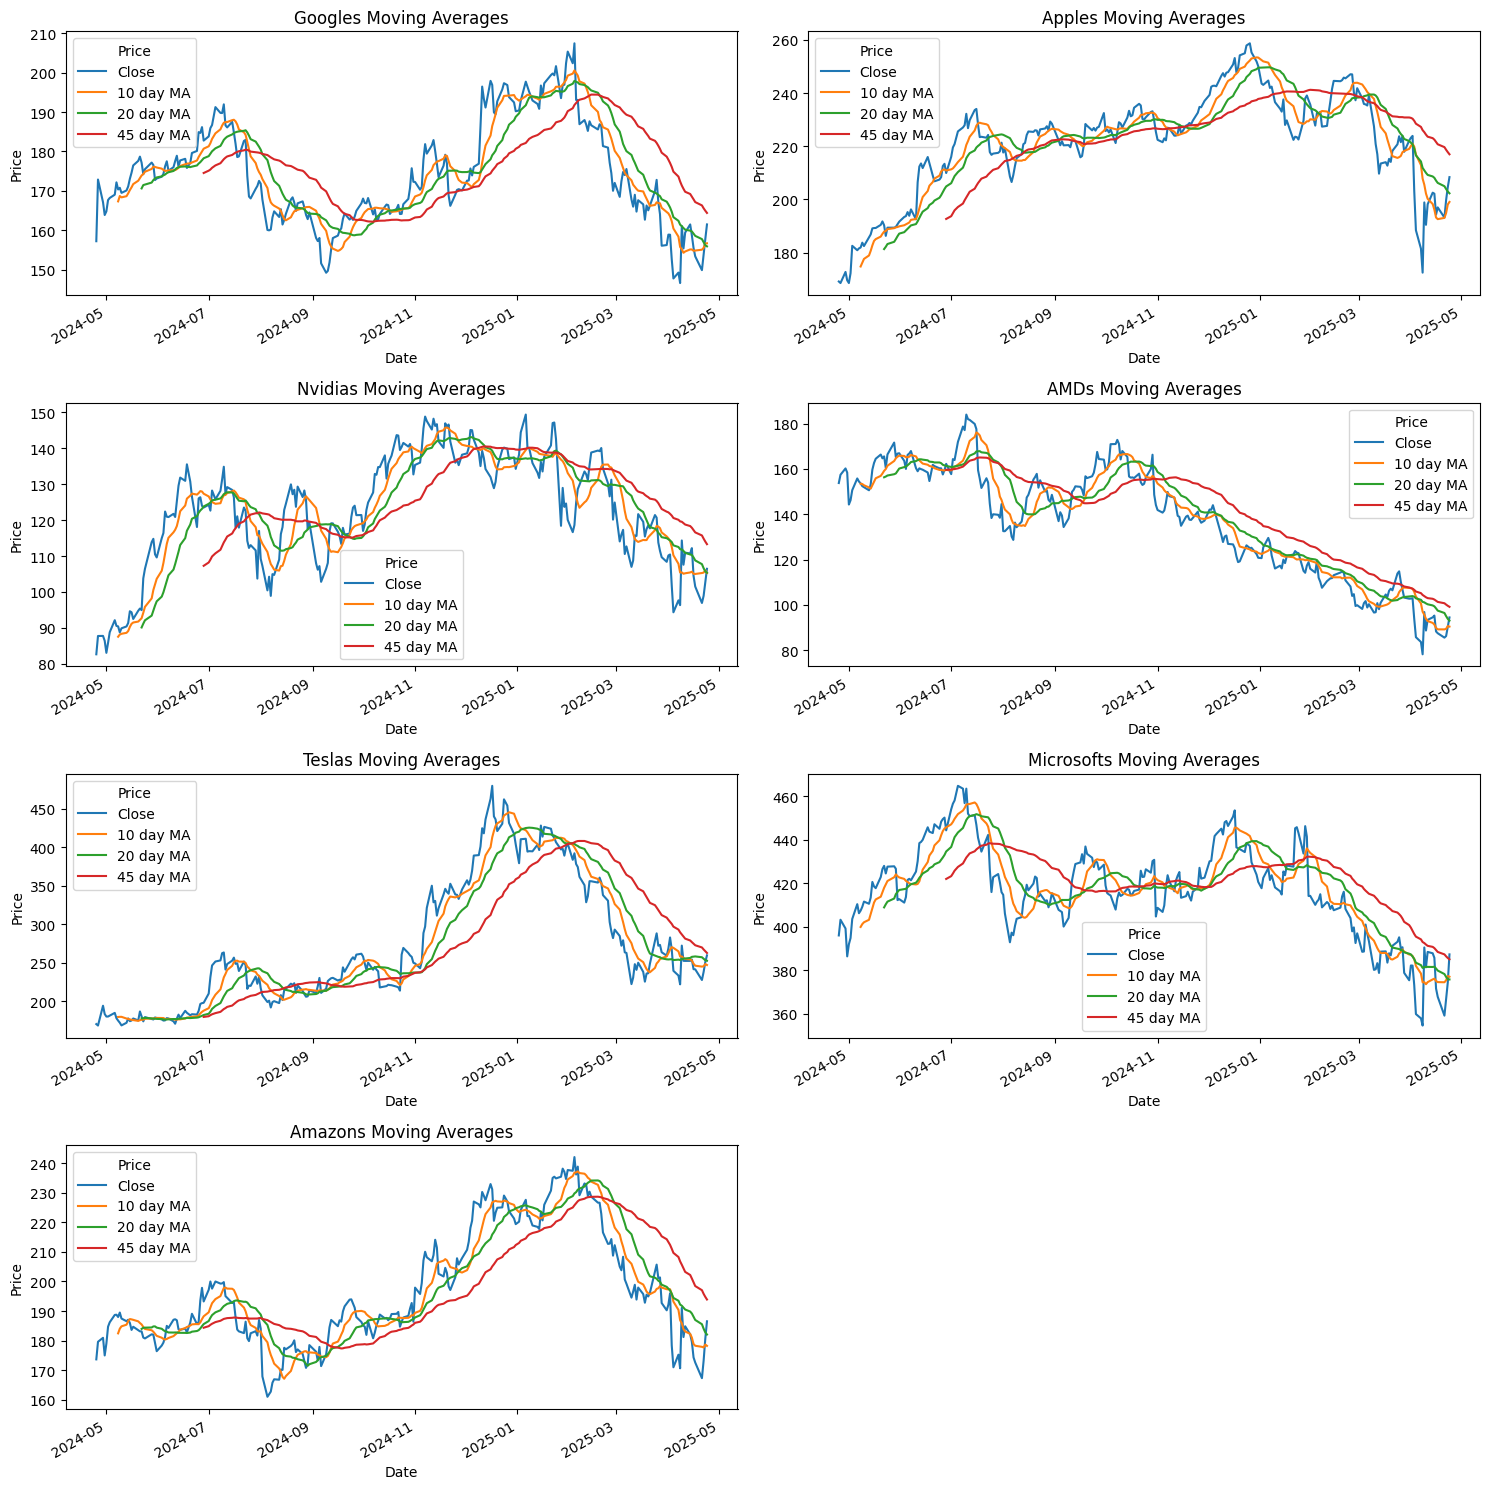

In [34]:
ma_ranges = [10, 20, 45]

for ma in ma_ranges:
    for ticker in stock_data:
        ma_column = f'{ma} day MA'
        stock_data[ticker][ma_column] = stock_data[ticker]['Close'].rolling(ma).mean()

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for i, ticker in enumerate(stock_data):
    stock_data[ticker][['Close', '10 day MA', '20 day MA', '45 day MA']].plot(ax=axes[i])
    axes[i].set_title(f'{company_name[i]}s Moving Averages')
    axes[i].set_ylabel('Price')

axes[-1].axis('off')


plt.tight_layout()


Looking at the 45 day moving average for simplicity, most stocks besides microsoft and AMD had an upward trend coming into 2025. This can be due to a multitude of factors but whats important is that all technology stocks and probably the s&p500 as a whole has been on a downward trend during 2025. 

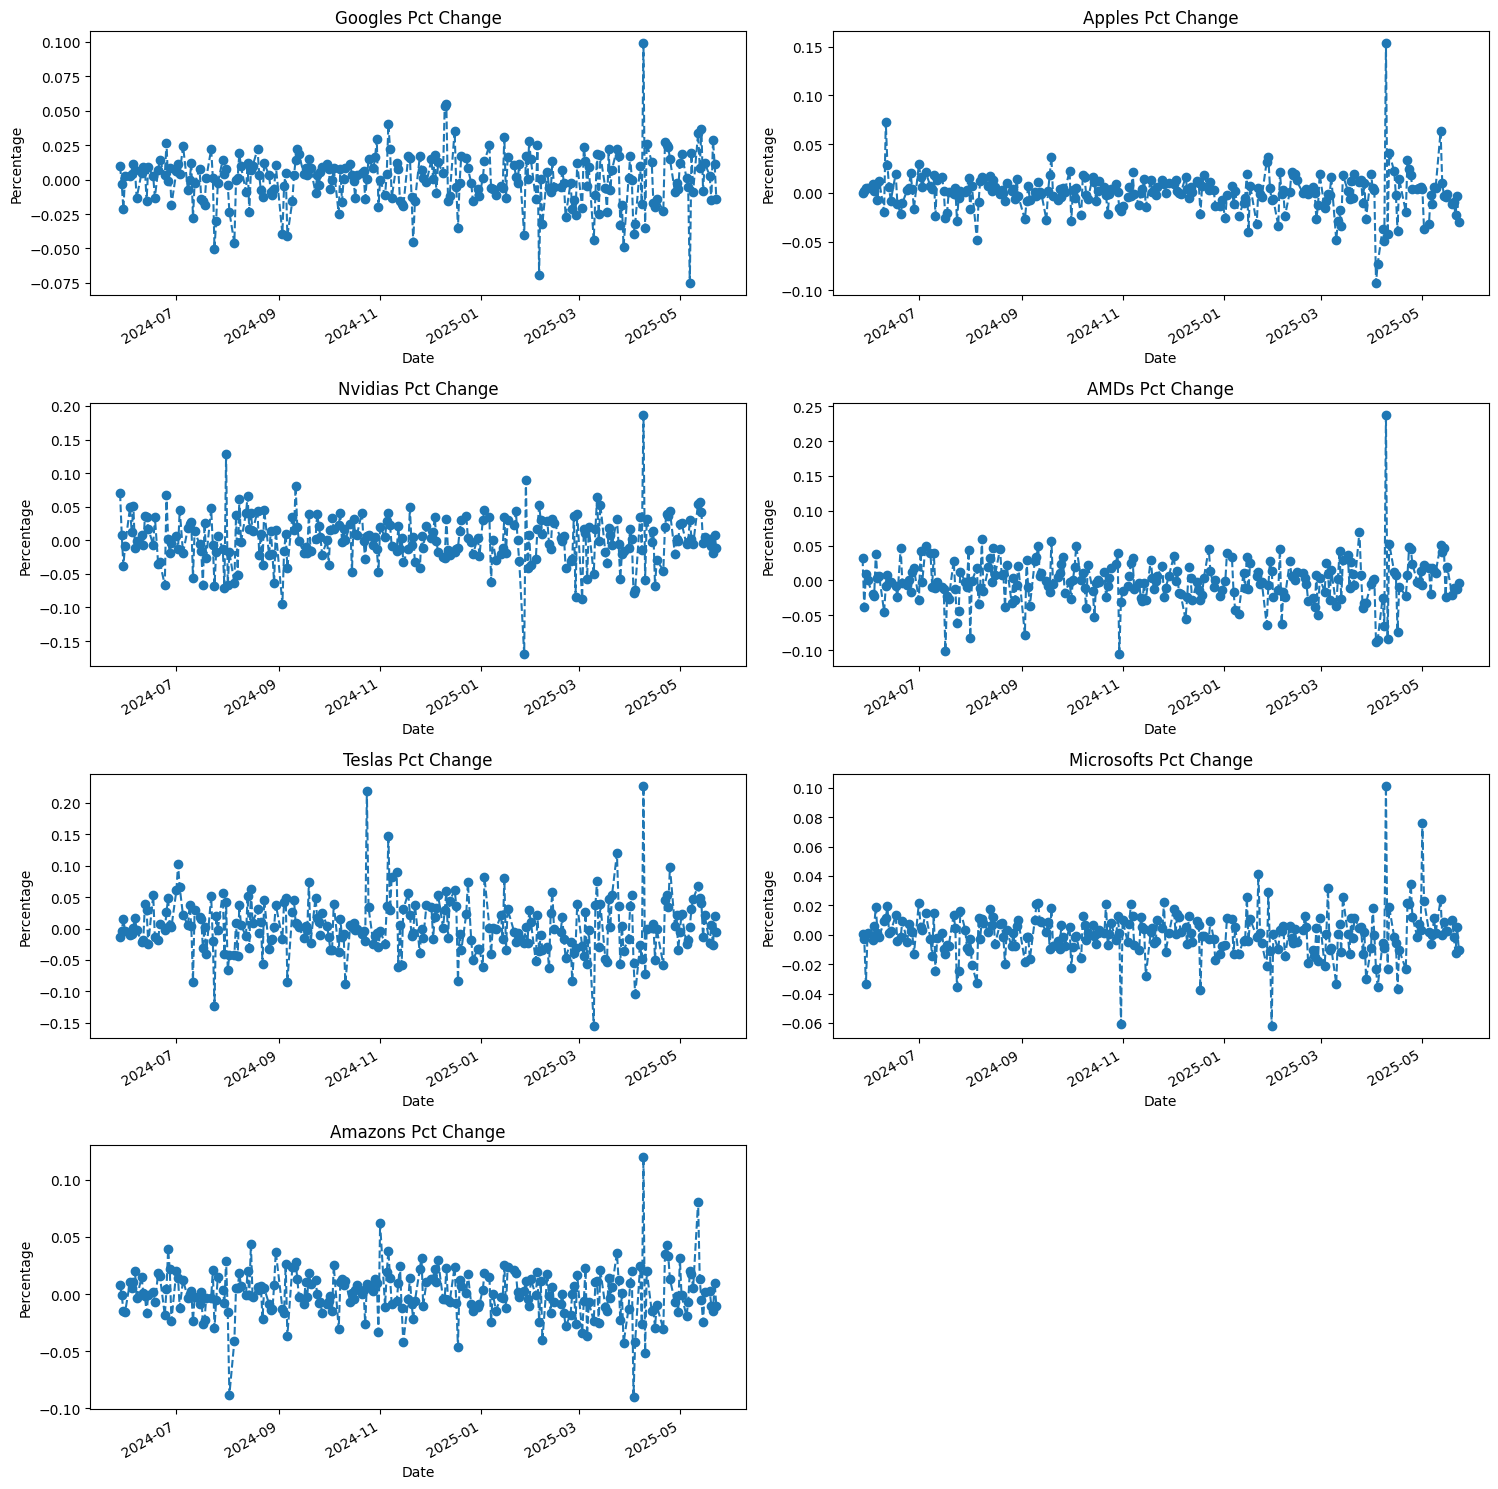

In [4]:
#Lets look at the pct change of closing prices for each stock

for ticker in stock_data:
    stock_data[ticker]['Daily Pct Change'] = stock_data[ticker]['Close'].pct_change()

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for i, ticker in enumerate(stock_data):
    stock_data[ticker][['Daily Pct Change']].plot(ax=axes[i], linestyle='--', marker='o')
    axes[i].set_title(f'{company_name[i]}s Pct Change')
    axes[i].set_ylabel('Percentage')
    axes[i].get_legend().set_visible(False)

axes[-1].axis('off')


plt.tight_layout()


Using the daily pct change graphs to draw some insight, the higher the vertical spread is, the higher the volatility of that stock is. Judging from the graph, Tesla is the most price volatile stock out of these seven, which is as I predicted prior. 

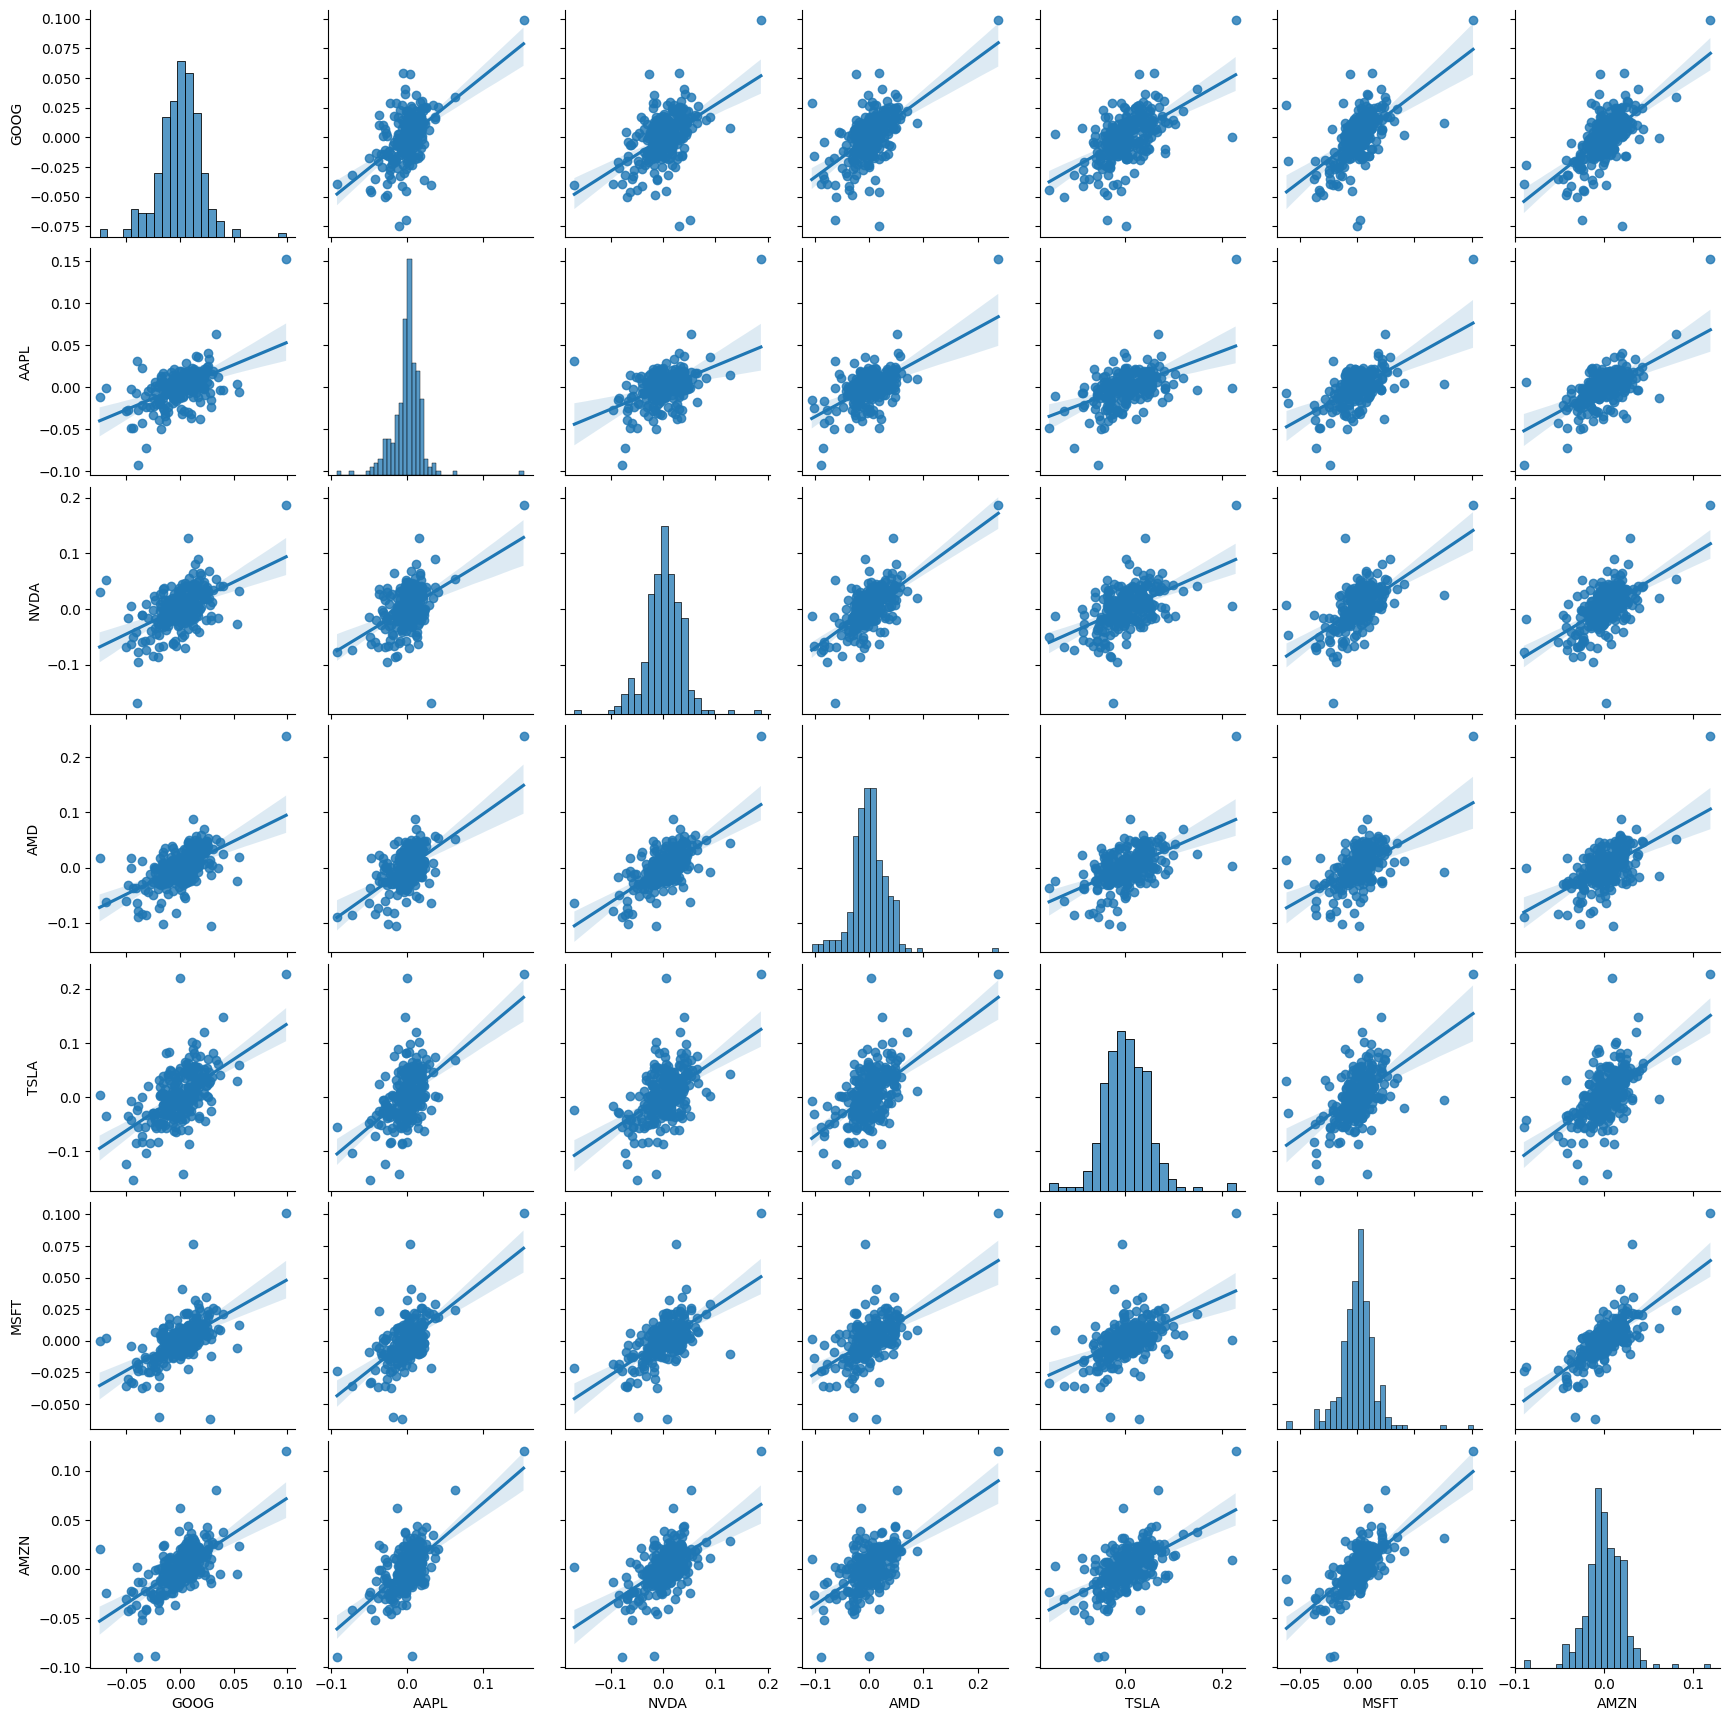

In [4]:
# Now I am going to find the closing price correlation between the stocks, I predict that most stocks will have a similar correlation besides Tesla due to its volatility.

# Create an empty DataFrame w/ pandas to store the Adjusted Close prices so we can use just this dataframe for visualization and analysis
closing_prices = pd.DataFrame()


for ticker in company_ticker:
    df = stock_data[ticker]
    closing_prices[ticker] = df['Close']

all_daily_change = closing_prices.pct_change()

#print(all_daily_change.head())

#sns.jointplot(x='GOOG', y='AAPL', data=all_daily_change, kind='scatter', color='seagreen')
sns.pairplot(all_daily_change, kind='reg')

#From the graphs below, we can see that for the most part, stocks have a pretty linear relationship with MSFT and AMZN having the highest linear relationship

Text(0.5, 1.0, 'Correlation of Daily Returns')

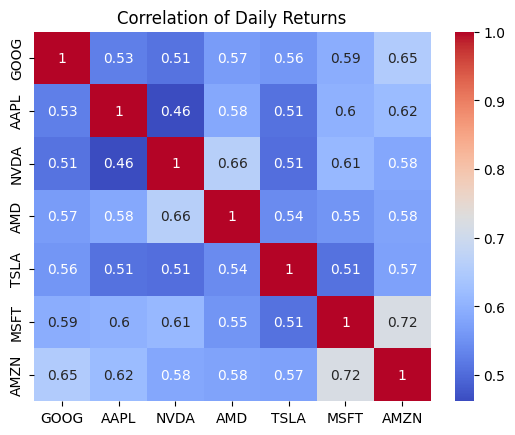

In [5]:

sns.heatmap(all_daily_change.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns')

#as of 5/1/25, using the heatmap of correlations below, our visual hypothesis from above of highest correlation is correct -> MSFT and AMZN

In [ ]:


trading_days = 252 # were going to use this to annualize our sharpe ratio since our data is DAILY pct change
risk_free_rate_annual = 0.0425 # we'll use the average risk-free rate past 10 years based on US treasury treasuries for simplicity
risk_free_daily = risk_free_rate_annual / trading_days # need to convert risk free rate to daily risk free pct change since our mean is based on daily pct change data

summary_stats = all_daily_change.describe().T[['mean', 'std']]
summary_stats['Excess Return'] = summary_stats['mean'] - risk_free_daily
summary_stats['Sharpe Ratio (Annualized)'] = (summary_stats['Excess Return'] / summary_stats['std']) * np.sqrt(trading_days) # annualizing the sharpe ratio
print(summary_stats[['Sharpe Ratio (Annualized)']])
print(summary_stats['std'])


      Sharpe Ratio (Annualized)
GOOG                  -0.232361
AAPL                  -0.059114
NVDA                   0.564844
AMD                   -0.216526
TSLA                   1.186141
MSFT                   0.315552
AMZN                   0.389280
GOOG    0.019989
AAPL    0.020357
NVDA    0.036473
AMD     0.033814
TSLA    0.047116
MSFT    0.016116
AMZN    0.021899
Name: std, dtype: float64


Sharpe ratio is decent for  appl, nvdia, tsla, and amazon but terrible for amd, msft, goog. This is 5/3/2024 - 2025 data so its not a wholistic representation of the stocks return to risk ratio. What we can see though is that over the past year, the most volatile stock has the best return to risk ratio which is interesting because usually high volatility = high risk which should result in a lower sharpe ratio. I am guessing TSLA's returns this year are so large that it overshines its risk. 

We also found that amazon and microsoft have the most correlated daily returns earlier but the sharpe ratio tells us that microsoft has been a lot riskier than amazon. This can suggest those trading these stocks to lessen their position in MSFT and place it into AMZN as they are highly correlated but MSFT is just a riskier option. 